# SMS Spam Detection Using Machine Learning Algorithms

## Problem Statement :

-The SMS Spam Collection is a set of SMS tagged messages that have  been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham  or spam.

# Importing libraries and loading datasets

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import pickle

In [12]:
df = pd.read_csv(r'spam1.csv', encoding='latin-1')

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

### We will go through the following steps in this project:
- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvement
- Website
- Deployment

# 1. Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# As we can see that the last 3 columns have most missing values, so we will drop those columns

In [17]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [18]:
df.sample(5)

,v1,v2
2111,ham,Yar he quite clever but aft many guesses lor. ...
2407,ham,Solve d Case : A Man Was Found Murdered On &l...
402,ham,The hair cream has not been shipped.
3926,ham,Lol ... I really need to remember to eat when ...
3209,ham,"She said,'' do u mind if I go into the bedroom..."


In [19]:
# For better understanding we will rename the columns
df.rename(columns={'v1':'label','v2':'text'}, inplace=True)

In [20]:
df.sample(5)

,label,text
1761,ham,Got ur mail Dileep.thank you so muchand look f...
4102,spam,U have a secret admirer who is looking 2 make ...
3478,ham,Be sure to check your yahoo email. We sent pho...
5512,ham,"Just making dinner, you ?"
2441,ham,Back in brum! Thanks for putting us up and kee...


In [21]:
# Now we will convert the label column to numeric
df['label'] = df['label'].map({'ham':0,'spam':1})

In [22]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# Checking missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [24]:
# Checking duplicate values
df.duplicated().sum()

403

In [25]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis

In [28]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

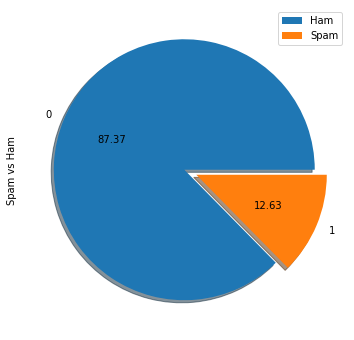

In [30]:
#Lets see what precentage of our data is spam/ham
df["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%0.2f', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [31]:
# From above pie chart we can see that around 87% of sms are ham. Clearly the data is imbalanced.

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_characters'] = df['text'].apply(len)

In [34]:
df.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# Calculating number of words from every text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,label,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# Calculating number of sentences from every text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# Description of ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
# Description of spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [42]:
# From above both descriptions we can clearly see that mean of characters for ham is 70, whereas, that of spam is 137.

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

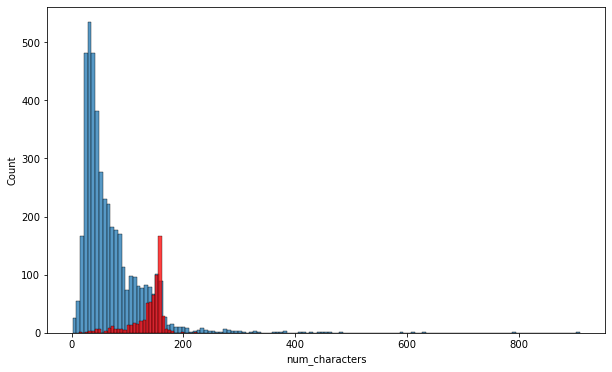

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

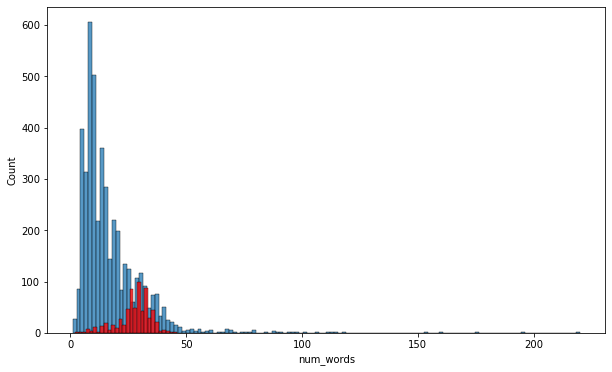

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

In [45]:
# Now we will check the relation between the columns

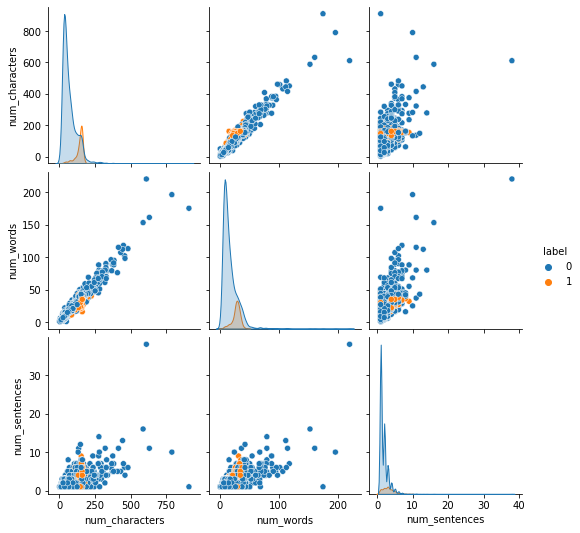

In [46]:
sns.pairplot(df, hue='label')

In [47]:
corr = df.corr()
corr

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

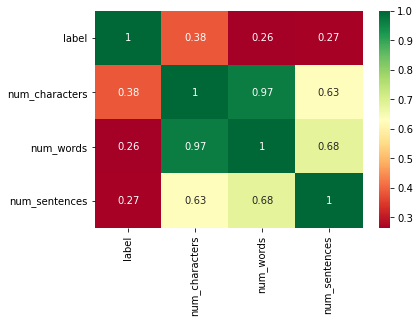

In [48]:
sns.heatmap(corr, annot=True, cmap='RdYlGn')

- We can say that as the number of characters increase chance of the text being spam increases.
- Also the relation between the feature columns themselves is very high, so for a good model we will have to use only one feature from num_characters, num_words and num_sentences.

# 3. Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [50]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df['text'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [52]:
transform_text("Even my brother is not like to speak with me. They treat me like aids patent.")

'even brother like speak treat like aid patent'

In [53]:
# Here we can see that the stopwords are removed from the text that we passed.

In [54]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
# Above we created a new column named 'transformed_text' that shows us the text after removing the stopwords from it.

In [56]:
#Generate world cloud of spam messages

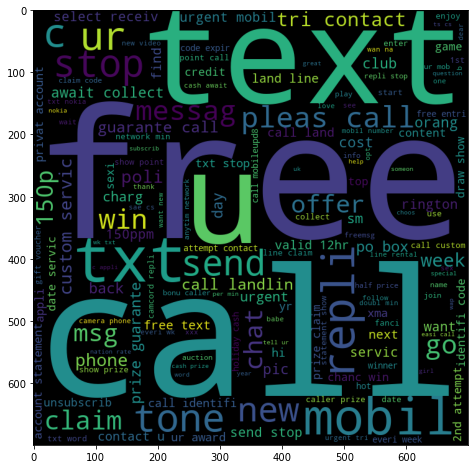

In [57]:
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

In [58]:
# In the above figure we can see the words that appear the most in spam messages. 

In [59]:
#Generate world cloud of ham messages

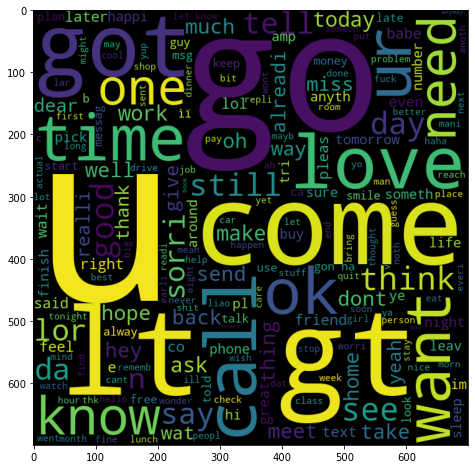

In [60]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)

In [61]:
# In the above figure we can see the words that appear the most in ham messages. 

In [62]:
# let check top 35 word use in spam messages
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [63]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


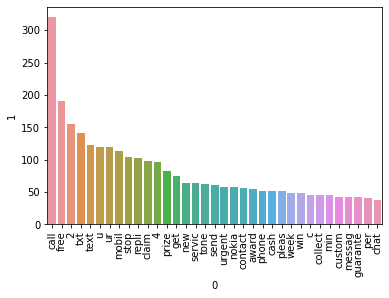

In [64]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(35))[0],pd.DataFrame(Counter(spam_corpus).most_common(35))[1])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
# Above plot shows us the count of how many times that word has been used in the text of spam messages.

In [66]:
# let check top 35 word use in ham messages
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [67]:
len(ham_corpus)

35402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


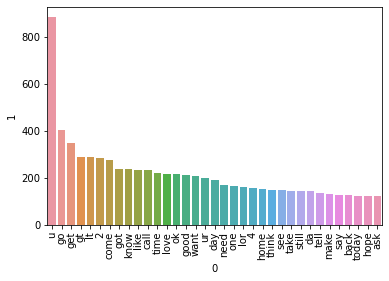

In [68]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(35))[0],pd.DataFrame(Counter(ham_corpus).most_common(35))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
# Above plot shows us the count of how many times that word has been used in the text of ham messages.

# 4.Model Building

In [70]:
# Text Vectorization 

In [71]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [72]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [73]:
X.shape

(5169, 3000)

In [74]:
y = df['label'].values

In [75]:
# Splitting the data into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Naive_Bayes

In [76]:
# We have stored the classifiers into variables.
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Gausian naive_bayes

In [77]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy of Gausian naive_bayes is: ",accuracy_score(y_test,y_pred1))
print("Precision of Gausian naive_bayes is: ",precision_score(y_test,y_pred1))
print('\n'"Confusion_Matrix Gausian naive_bayes is: ",'\n',confusion_matrix(y_test,y_pred1))

Accuracy of Gausian naive_bayes is:  0.8694390715667312
Precision of Gausian naive_bayes is:  0.5068493150684932

Confusion_Matrix Gausian naive_bayes is:  
 [[788 108]
 [ 27 111]]


## Multinominal naive_bayes

In [78]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy of Multinominal naive_bayes is: ",accuracy_score(y_test,y_pred2))
print("Precision of Multinominal naive_bayes is: ",precision_score(y_test,y_pred2))
print('\n'"Confusion_Matrix Multinominal naive_bayes is: ",'\n',confusion_matrix(y_test,y_pred2))

Accuracy of Multinominal naive_bayes is:  0.9709864603481625
Precision of Multinominal naive_bayes is:  1.0

Confusion_Matrix Multinominal naive_bayes is:  
 [[896   0]
 [ 30 108]]


## Bernoulli naive_bayes

In [79]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy of Bernoulli naive_bayes is: ",accuracy_score(y_test,y_pred3))
print("Precision of Bernoulli naive_bayes is: ",precision_score(y_test,y_pred3))
print('\n'"Confusion_Matrix Bernoulli naive_bayes is: ",'\n',confusion_matrix(y_test,y_pred3))

Accuracy of Bernoulli naive_bayes is:  0.9835589941972921
Precision of Bernoulli naive_bayes is:  0.991869918699187

Confusion_Matrix Bernoulli naive_bayes is:  
 [[895   1]
 [ 16 122]]


# Logistic Regression

In [80]:
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred)
classification_rep=classification_report(y_test,pred)


In [81]:
print('Classification Report: ','\n\n',classification_rep)
print('*'*70)
print("Accuracy of Logistic Regression classifier is: ",accuracy)
print("Precision of Logistic Regression classifier is: ",precision)
print('\n'"Confusion_Matrix Logistic Regression classifier is: ",'\n',confusion_matrix(y_test,pred))


Classification Report:  

               precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

**********************************************************************
Accuracy of Logistic Regression classifier is:  0.9564796905222437
Precision of Logistic Regression classifier is:  0.979381443298969

Confusion_Matrix Logistic Regression classifier is:  
 [[894   2]
 [ 43  95]]


# Random Forest Classifier

In [82]:
Random_forest = RandomForestClassifier(n_estimators=50)
model=Random_forest.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred)
classification_rep=classification_report(y_test,pred)

In [83]:
print('Classification Report: ','\n\n',classification_rep)
print('*'*70)
print("Accuracy of Random Forest Classifier is: ",accuracy)
print("Precision of Random Forest Classifier is: ",precision)
print('\n'"Confusion_Matrix Random Forest Classifier is: ",'\n',confusion_matrix(y_test,pred))


Classification Report:  

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.99      0.82      0.90       138

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034

**********************************************************************
Accuracy of Random Forest Classifier is:  0.9748549323017408
Precision of Random Forest Classifier is:  0.9912280701754386

Confusion_Matrix Random Forest Classifier is:  
 [[895   1]
 [ 25 113]]


# Decision Tree Classifier

In [84]:
dt = tree.DecisionTreeClassifier()
model = dt.fit(X_train, y_train)
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred)
classification_rep=classification_report(y_test,pred)

In [85]:
print('Classification Report: ','\n\n',classification_rep)
print('*'*70)
print("Accuracy of Decision Tree Classifier is: ",accuracy)
print("Precision of Decision Tree Classifier is: ",precision)
print('\n'"Confusion_Matrix Precision of Decision Tree Classifier is: ",'\n',confusion_matrix(y_test,pred))


Classification Report:  

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       896
           1       0.79      0.81      0.80       138

    accuracy                           0.95      1034
   macro avg       0.88      0.89      0.88      1034
weighted avg       0.95      0.95      0.95      1034

**********************************************************************
Accuracy of Decision Tree Classifier is:  0.9458413926499033
Precision of Decision Tree Classifier is:  0.7887323943661971

Confusion_Matrix Precision of Decision Tree Classifier is:  
 [[866  30]
 [ 26 112]]


# K-Nearest Neighbors Classifier

In [86]:
k_values=[1,3,5,7,9]

for i in k_values:
    knn=KNeighborsClassifier(n_neighbors = i)
    model=knn.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    print("Accuracy of KNN Classifier with k value %s: " %i,accuracy)
    print("Precision of KNN Classifier with k value %s: " %i,precision)

Accuracy of KNN Classifier with k value 1:  0.9352030947775629
Precision of KNN Classifier with k value 1:  1.0
Accuracy of KNN Classifier with k value 3:  0.9177949709864603
Precision of KNN Classifier with k value 3:  1.0
Accuracy of KNN Classifier with k value 5:  0.9052224371373307
Precision of KNN Classifier with k value 5:  1.0
Accuracy of KNN Classifier with k value 7:  0.9003868471953579
Precision of KNN Classifier with k value 7:  1.0
Accuracy of KNN Classifier with k value 9:  0.8878143133462283
Precision of KNN Classifier with k value 9:  1.0


In [87]:
# Now we will create a new dataframe to store the accuracy and precision scores of all the models and compare them.

In [88]:
performance_df={"Algorithm":["Gaussian_NB","Multinomial_NB","Bernoulli_NB","Logistic_Regression","Random_Forest","Decision_Tree"," KNeighbors"],
               "Accuracy":[0.8694,0.9709,0.9835,0.9564,0.9700,0.9487,0.9352],
               "Precision":[0.5068,1.0,0.9918,0.9793,0.9739,0.7887,1.0]}
p_df=pd.DataFrame(performance_df).sort_values('Precision',ascending=False)

In [89]:
p_df

,Algorithm,Accuracy,Precision
1,Multinomial_NB,0.9709,1.0000
6,KNeighbors,0.9352,1.0000
2,Bernoulli_NB,0.9835,0.9918
3,Logistic_Regression,0.9564,0.9793
4,Random_Forest,0.9700,0.9739
5,Decision_Tree,0.9487,0.7887
0,Gaussian_NB,0.8694,0.5068


- By comparing the models from the above dataframe Accuracy of Bernoulli_NB is highest i.e. 98.35% and Precision of Multinomial_NB is highest i.e. 100%.
- If we consider Precision instead of Accuracy, Multinomial_NB is the best model.

In [90]:
# For better visualization of the dataframe we are plotting bar plot 

Text(0, 0.5, 'Accuracy /  Precision')

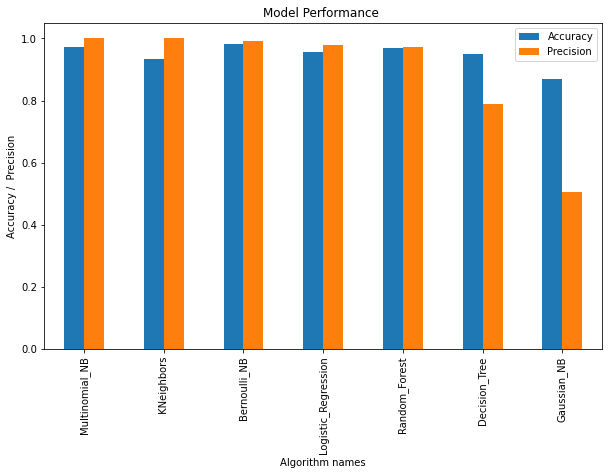

In [91]:
p_df.plot(kind="bar",x="Algorithm",figsize=(10, 6))
plt.title("Model Performance ")
plt.xlabel("Algorithm names")
plt.ylabel("Accuracy /  Precision")


# Model Improvement

- We will try to use Stacking classifier to see if our model makes any improvement.

## Stacking Classifier

In [92]:
estimators=[('mb', mnb), ('kn', knn), ('bb', bnb)]
final_estimator=LogisticRegression()

In [93]:
sc = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)

In [94]:
print("Accuracy of Stacking Classifier is:",accuracy_score(y_test,y_pred))
print("Precision of Stacking Classifier is:",precision_score(y_test,y_pred))

Accuracy of Stacking Classifier is: 0.9864603481624759
Precision of Stacking Classifier is: 0.9920634920634921


- After using stacking classifier our model has improved a little. But still Multinomial Naive Bayes is best model because it has high accuracy as well as high precision.

###  Create Pickle File

In [96]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))